# 대학마다 대학평가점수 예측 , 회기 알고리즘 - Linear Regression
---

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

# 라이브러리 호출

In [107]:
df = pd.read_csv('universityrank.csv') # csv 파일을 데이터프레임 형식으로 읽어온다.
df.shape # 데이터프레임의 크기 확인하기.

(5250, 6)

In [108]:
df.head() # 데이터프레임의 상위 다섯개 데이터를 출력한다.

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States


In [109]:
df.isna().sum() # 결측치 데이터값의 개수를 합산하여 출력한다.

Year         0
Rank         0
Name         0
Point      220
City         0
Country      1
dtype: int64

In [110]:
df = df.dropna(subset=['Point']) # 데이터프레임에서 Point 컬럼값의 결측치 값을 제거한다.

In [111]:
df.isna().sum() # 결측치 데이터값의 개수 합산을 재확인함으로써 결측치 값이 제거 된 것을 확인 할 수 있다.

Year       0
Rank       0
Name       0
Point      0
City       0
Country    1
dtype: int64

<AxesSubplot: >

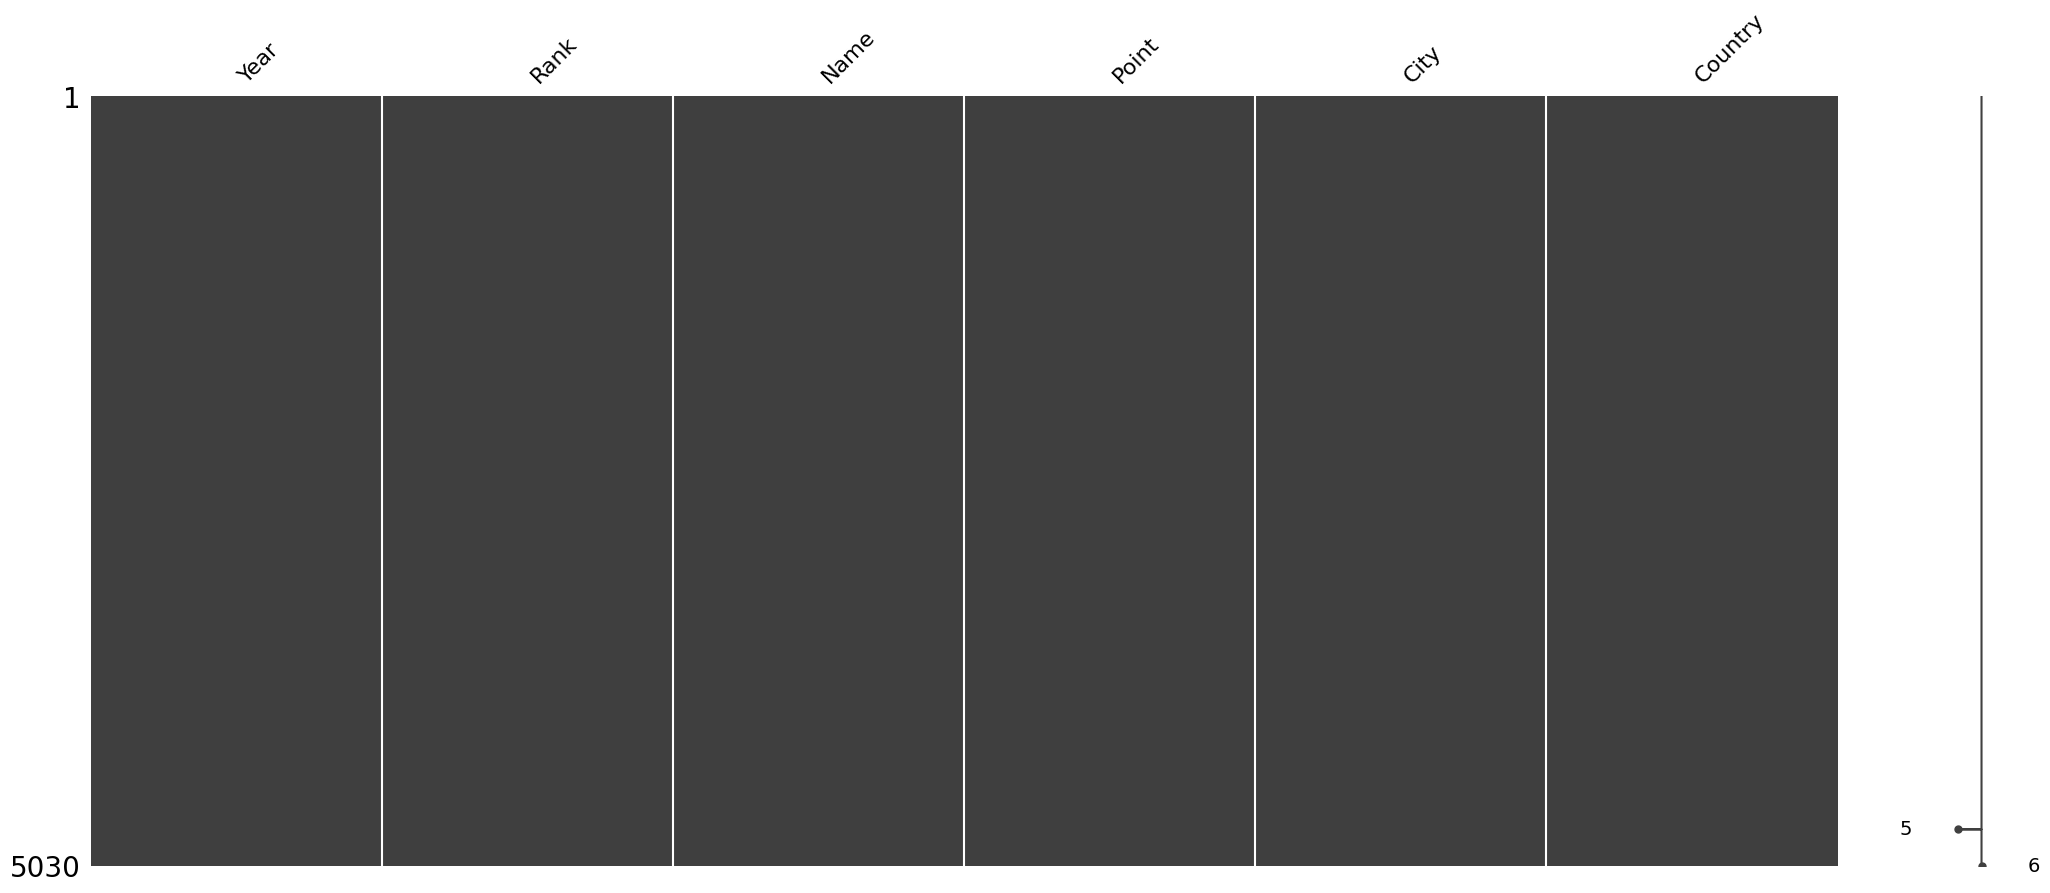

In [112]:
import missingno as msno # 결측치 데이터를 matrix로 나타내는 라이브러리.

msno.matrix(df) # 데이터프레임의 결측치 데이터를 matrix로 표현한다.

In [113]:
df.loc[df['Country'].isna()] # Country column의 결측치 location을 나타내줌.

,Year,Rank,Name,Point,City,Country
4990,2022,90,Universit Paris-Saclay,75.4,Gif-sur-Yvette,NaN


In [114]:
df = df.dropna(subset=['Country']) # Country column의 결측치 데이터를 제거한다.

In [115]:
upperlist = [] # upperlist 변수에 담을 리스트를 공백으로 생성.
for x in df.columns: # 데이터프레임의 columns를 x 변수로 반복 실행.
    upperlist.append(x.lower()) # df.columns의 리스트 데이터에서 value의 값을 lower함수를 통해 대문자를 소문자로 변환시켜 upperlist의 빈 리스트에 하나씩 대입한다.

In [116]:
df.columns = upperlist # df.columns의 원본 columns를 upperlist에 저장된 소문자 columns형태의 리스트를 대입한다.

In [117]:
df.columns # 데이터프레임의 columns 출력.

Index(['year', 'rank', 'name', 'point', 'city', 'country'], dtype='object')

In [118]:
df.head()

,year,rank,name,point,city,country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States


In [119]:
df.loc[df['name']=='Harvard University'] # 데이터프레임 columns중 name columns에서 Harvard University라는 문자열 원소를 가진 location을 출력함.

,year,rank,name,point,city,country
0,2018,1,Harvard University,97.7,Cambridge,United States
350,2019,1,Harvard University,97.7,Cambridge,United States
700,2019,1,Harvard University,98.2,Cambridge,United States
1050,2020,1,Harvard University,97.7,Cambridge,United States
1400,2020,1,Harvard University,98.2,Cambridge,United States
1750,2020,1,Harvard University,98.5,Cambridge,United States
2100,2021,1,Harvard University,97.7,Cambridge,United States
2450,2021,1,Harvard University,98.2,Cambridge,United States
2800,2021,1,Harvard University,98.5,Cambridge,United States
3150,2021,1,Harvard University,98.6,Cambridge,United States


In [120]:
df['year'].unique() # 데이터프레임에서 year column의 원소값들을 출력하는 함수.

array([2018, 2019, 2020, 2021, 2022], dtype=int64)

In [121]:
df['year'].value_counts() # 데이터프레임에서 year column의 원소값을 가진 합산을 출력하는 함수.

2022    1670
2021    1343
2020    1009
2019     672
2018     335
Name: year, dtype: int64

In [122]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['year', 'rank', 'name', 'city', 'country']: # 리스트에 속한 데이터프레임의 columns를 인덱스로 대입하여
    df[col] = encoder.fit_transform(df[col]) # 해당 column의 원소들을 정수형 타입으로 인코딩한다.

In [123]:
x = df.drop(['point'],axis=1) # x, y 데이터 분리하는 작업. y가 결과값이다.
y = df['point']

In [124]:
# print(df['point']) = print(df.loc[:,'point'])

In [125]:
from sklearn.model_selection import train_test_split # 학습 데이터와, 테스트 데이터를 분리하고, 자동으로 섞어주는 라이브러리, random_state = 2022를 통해 그 값은 항상 고정된다.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2022)

In [126]:
from sklearn.preprocessing import StandardScaler # 실제 데이터값, 평균 값, 표준편차 값을 통한 표준화 과정.

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [127]:
y_train = y_train.values # 시리즈 형태의 데이터값을 넘파이 배열로 변환

In [128]:
from sklearn.linear_model import LinearRegression # 머신러닝 선형 회귀 알고리즘

lr = LinearRegression()
lr.fit(x_train, y_train) # fit함수를 통해 컴퓨터를 학습시킨다.

LinearRegression()

In [129]:
lr.score(x_train, y_train) # lr의 score는 R2의 값을 나타냄. 1에 근접 할 수록 좋은 결과이다. 

0.9159386477474661

### 테스트

In [130]:
x_test = scaler.fit_transform(x_test) # 표준화를 fit_transform을 통해 계산과 변환을 동시에 적용시킨다.
y_test = y_test.values # 시리즈 타입의 y_test 값을 넘파이 배열로 변환.

In [131]:
x_test

array([[ 1.06252367, -1.39096624,  0.36384383,  1.52136185, -1.61697594],
       [-0.5521271 , -0.27999667,  0.40012003, -0.25321849,  0.90980406],
       [ 0.25519828, -0.9221167 , -0.65188986,  0.07817904,  0.84663456],
       ...,
       [ 0.25519828, -0.98327099, -1.0509281 , -0.02872339, -0.22724694],
       [-1.35945249, -1.30942719,  0.46360339, -1.01222574,  0.90980406],
       [-0.5521271 ,  0.70866432, -0.63375176, -0.14631606, -1.61697594]])

In [132]:
y_pred = lr.predict(x_test) # x_test 데이터를 통하여 컴퓨터에게 학습시킨 내용을 토대로 predict함수를 통해 결과값을 예측시켜 y_pred 변수에 대입한다.

In [133]:
y_test, y_pred

(array([82.4, 70.1, 77.6, ..., 77.9, 80.1, 65.6]),
 array([81.49052415, 73.00321788, 78.33928902, ..., 78.56478308,
        80.7074709 , 64.78095958]))

In [134]:
examdf = pd.DataFrame(y_test) # examdf라는 새로운 데이터프레임을 생성하여, 실제 데이터값 y_test와 컴퓨터 예측 데이터값 y_pred의 데이터값을 비교해보기 위해 생성하였다.
examdf['y_pred'] = pd.DataFrame(y_pred)

In [135]:
examdf

,0,y_pred
0,82.4,81.490524
1,70.1,73.003218
2,77.6,78.339289
3,68.1,68.807102
4,60.9,58.977969
...,...,...
1001,66.6,66.610293
1002,62.6,60.172606
1003,77.9,78.564783
1004,80.1,80.707471


In [136]:
examdf.columns = ['y_test', 'y_pred'] 

In [137]:
examdf

,y_test,y_pred
0,82.4,81.490524
1,70.1,73.003218
2,77.6,78.339289
3,68.1,68.807102
4,60.9,58.977969
...,...,...
1001,66.6,66.610293
1002,62.6,60.172606
1003,77.9,78.564783
1004,80.1,80.707471


In [138]:
examdf['x_origin'] = pd.Series(range(0,1006))

In [139]:
examdf

,y_test,y_pred,x_origin
0,82.4,81.490524,0
1,70.1,73.003218,1
2,77.6,78.339289,2
3,68.1,68.807102,3
4,60.9,58.977969,4
...,...,...,...
1001,66.6,66.610293,1001
1002,62.6,60.172606,1002
1003,77.9,78.564783,1003
1004,80.1,80.707471,1004


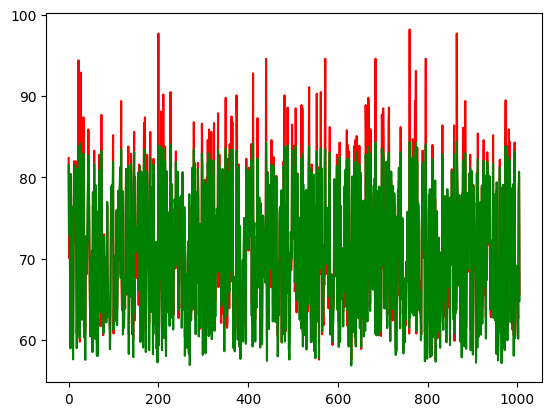

In [140]:
plt.plot(examdf['x_origin'], examdf['y_test'], 'r') # 빨간 선은 실제 데이터, 파란 점은 컴퓨터 예측값.
plt.plot(examdf['x_origin'], examdf['y_pred'], 'g')

In [141]:
from sklearn.metrics import mean_squared_error # mse 오차의 제곱의 평균, 예측 값과 실제 데이터 값과의 오차를 제곱하여 평균 값으로 환산하는 데이터이다.

# MSE
mse = mean_squared_error(y_test, y_pred)
mse

5.24133835835532

In [142]:
rmse = np.sqrt(mse) # rmse는 mse(mean squared error)의 루트값.
rmse

2.2893969420690943

In [143]:
from sklearn.model_selection import cross_val_score # cross validation을 통해 데이터의 검증방법을 cv를 통해 여러 구간으로 나누어서 확인시킨다.

mse = cross_val_score(lr, x_test, y_test,
                scoring='neg_mean_squared_error',
               cv=1000) 

In [144]:
np.mean(np.sqrt(-mse))

1.6979128905667458